## Roll a dice 500 times and predict the probability distribution

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import theano

In [4]:
with pm.Model():
    rolls = pm.DiscreteUniform('rolls', lower=1, upper=6)
    trace = pm.sample(500)
trace['rolls']

<ipython-input-4-10fb5833db2e>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(500)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [rolls]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([3, 3, 3, ..., 5, 5, 1])

### now for unfair die

In [5]:
probs = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1]) #sums to 1
with pm.Model():
    rolls = pm.Multinomial('rolls', n=500, p=probs, shape=6)
    trace = pm.sample(1)

<ipython-input-5-a09df0aa85d8>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1)
Only 1 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [rolls]


Sampling 4 chains for 1_000 tune and 1 draw iterations (4_000 + 4 draws total) took 8 seconds.
/Users/donaldmcallister/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (4) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/Users/donaldmcallister/opt/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


### rolling 50 unfair die rolls and create a chart, expectation: fair die

In [8]:
observations = np.array([20,6,6,6,6,6])
with pm.Model():
    probs = pm.Dirichlet('probs', a=np.ones(6)) #flat prior
    rolls = pm.Multinomial('rolls', n=50, p=probs, observed=observations)
    trace = pm.sample(500)
trace['probs']

<ipython-input-8-710c5a52fb94>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [probs]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 10 seconds.


array([[0.44507776, 0.0654951 , 0.13419052, 0.15809721, 0.10166831,
        0.09547111],
       [0.3293557 , 0.14701854, 0.10029945, 0.1074039 , 0.15220276,
        0.16371965],
       [0.43292934, 0.09964529, 0.15307844, 0.143234  , 0.09975644,
        0.07135648],
       ...,
       [0.44823395, 0.1306975 , 0.07059642, 0.11921007, 0.11162876,
        0.1196333 ],
       [0.43353307, 0.22528812, 0.05840893, 0.10678745, 0.13814365,
        0.03783879],
       [0.46544627, 0.14001892, 0.05740562, 0.12879059, 0.11766882,
        0.09066977]])

- **why is the Dirichlet distribution used as a prior distribution in Bayesian statistics? it is the conjugate prior to a number of important probability distributions: the categorical distribution and the multinomial distribution. Using it as a prior makes the maths a lot easier.see: https://towardsdatascience.com/dirichlet-distribution-a82ab942a879**

### probability distribution of all the possible outcomes:

<ipython-input-9-145ad2d7e010>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace[100:])
/Users/donaldmcallister/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-9-145ad2d7e010>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


<Figure size 504x504 with 0 Axes>

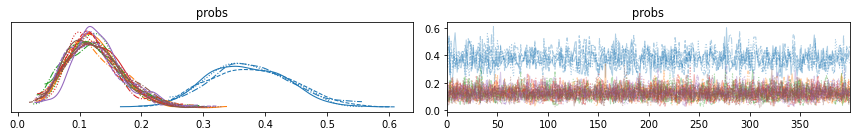

In [9]:
plt.figure(figsize=(7,7))
pm.traceplot(trace[100:])
plt.tight_layout();